# Visualising the data used in modelling

In [1]:
## Load the data

import pandas as pd
import numpy as np

gene_matrix_array = np.load("gene_matrix_list.npy")
rna_expression_df = pd.read_csv("rna_expression_list.csv")

# Check order of genes in both files is the same
assert gene_matrix_array.shape[0] == len(
    rna_expression_df
), "Mismatch in number of genes"

In [4]:
# Separate modification types
dnam_features = gene_matrix_array[:, :, 0]
h3k9me3_features = gene_matrix_array[:, :, 1]
h3k27me3_features = gene_matrix_array[:, :, 2]

rna_expression_binary = (rna_expression_df["expression"].values > 0.5).astype(
    int
) 
rna_expression_cont = rna_expression_df["expression"]




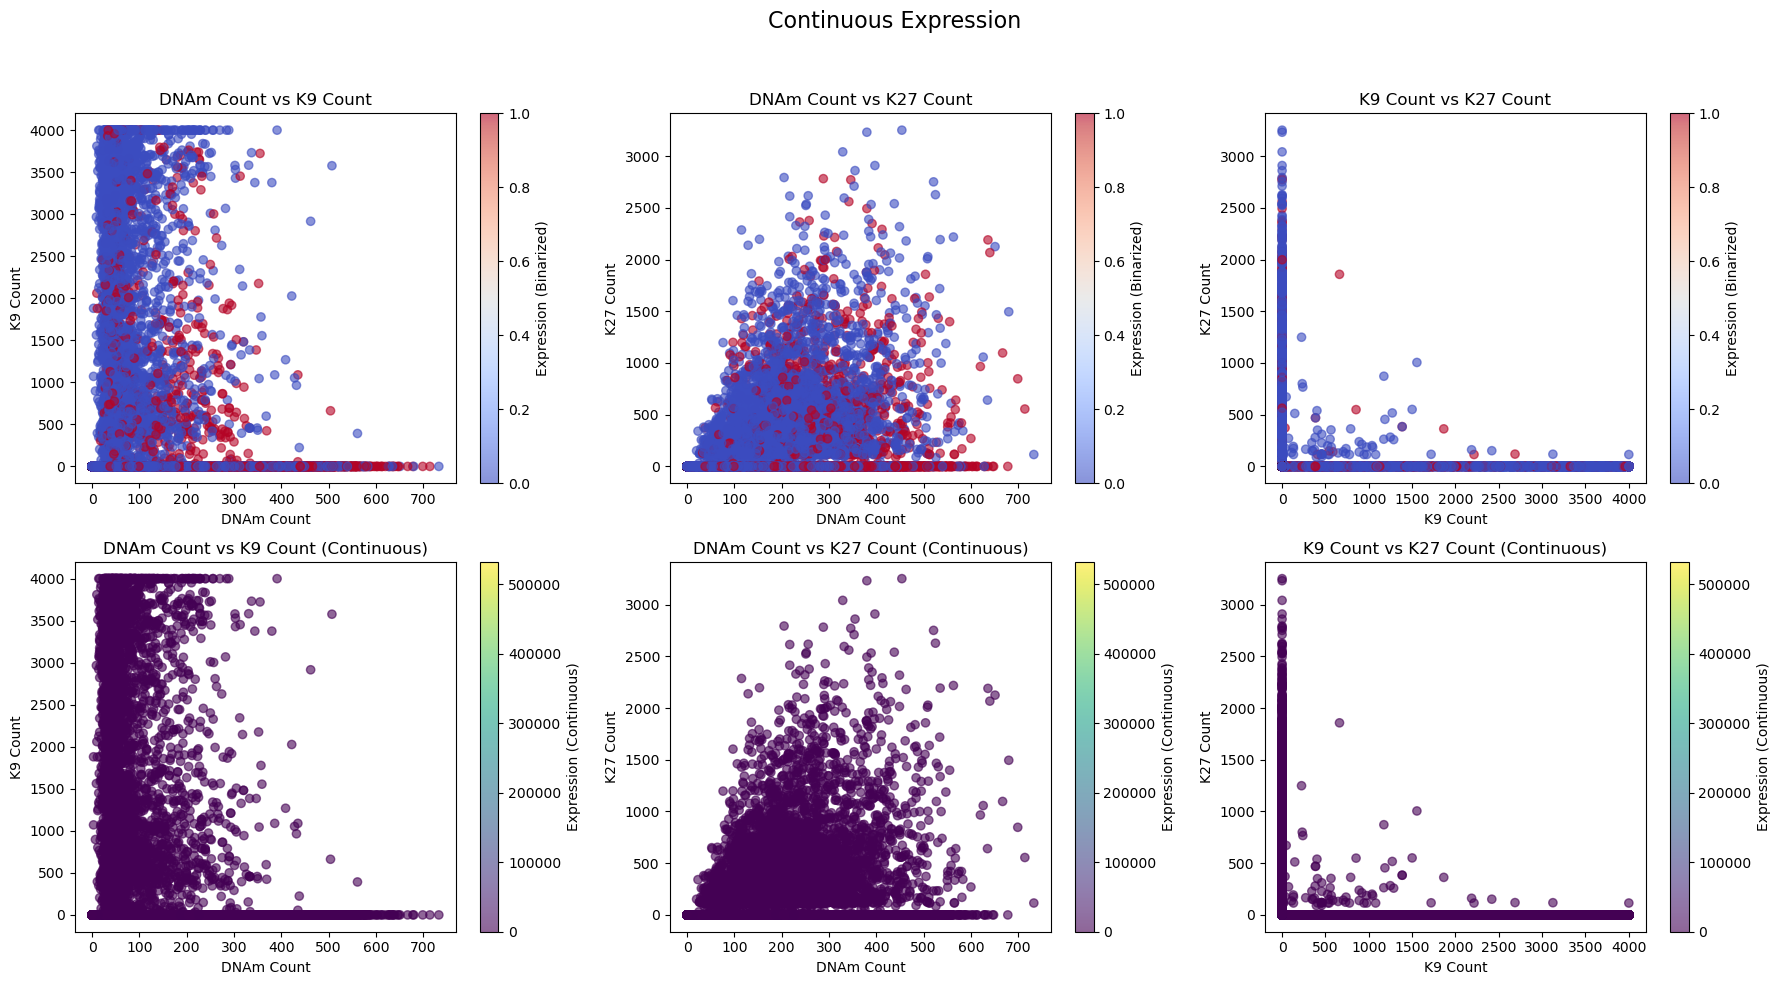

In [5]:
import numpy as np
import matplotlib.pyplot as plt



# Compute the sum of 1's (counts) for each section
DNAm_counts = np.sum(dnam_features, axis=1)   # Count of 1's in DNAm section
K9_counts = np.sum(h3k9me3_features, axis=1)  # Count of 1's in K9 section
K27_counts = np.sum(h3k27me3_features, axis=1)  # Count of 1's in K27 section

plt.figure(figsize=(18, 10))

### Version 1: binary expression
plt.suptitle('Binarised Expression (0 or 1)', fontsize=16)

# Plot 1: DNAm vs K9
plt.subplot(2, 3, 1)
scatter = plt.scatter(DNAm_counts, K9_counts, c=rna_expression_binary, cmap='coolwarm', alpha=0.6)
plt.colorbar(scatter, label='Expression (Binarized)')
plt.xlabel('DNAm Count')
plt.ylabel('K9 Count')
plt.title('DNAm Count vs K9 Count')

# Plot 2: DNAm vs K27
plt.subplot(2, 3, 2)
scatter = plt.scatter(DNAm_counts, K27_counts, c=rna_expression_binary, cmap='coolwarm', alpha=0.6)
plt.colorbar(scatter, label='Expression (Binarized)')
plt.xlabel('DNAm Count')
plt.ylabel('K27 Count')
plt.title('DNAm Count vs K27 Count')

# Plot 3: K9 vs K27
plt.subplot(2, 3, 3)
scatter = plt.scatter(K9_counts, K27_counts, c=rna_expression_binary, cmap='coolwarm', alpha=0.6)
plt.colorbar(scatter, label='Expression (Binarized)')
plt.xlabel('K9 Count')
plt.ylabel('K27 Count')
plt.title('K9 Count vs K27 Count')

### Version 2: Continuous expression
plt.suptitle('Continuous Expression', fontsize=16)

# Plot 1: DNAm vs K9
plt.subplot(2, 3, 4)
scatter = plt.scatter(DNAm_counts, K9_counts, c=rna_expression_cont, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Expression (Continuous)')
plt.xlabel('DNAm Count')
plt.ylabel('K9 Count')
plt.title('DNAm Count vs K9 Count (Continuous)')

# Plot 2: DNAm vs K27
plt.subplot(2, 3, 5)
scatter = plt.scatter(DNAm_counts, K27_counts, c=rna_expression_cont, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Expression (Continuous)')
plt.xlabel('DNAm Count')
plt.ylabel('K27 Count')
plt.title('DNAm Count vs K27 Count (Continuous)')

# Plot 3: K9 vs K27
plt.subplot(2, 3, 6)
scatter = plt.scatter(K9_counts, K27_counts, c=rna_expression_cont, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Expression (Continuous)')
plt.xlabel('K9 Count')
plt.ylabel('K27 Count')
plt.title('K9 Count vs K27 Count (Continuous)')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
### using balanced dataset since its a bit hard to see here



### Histograms for expression (binary)

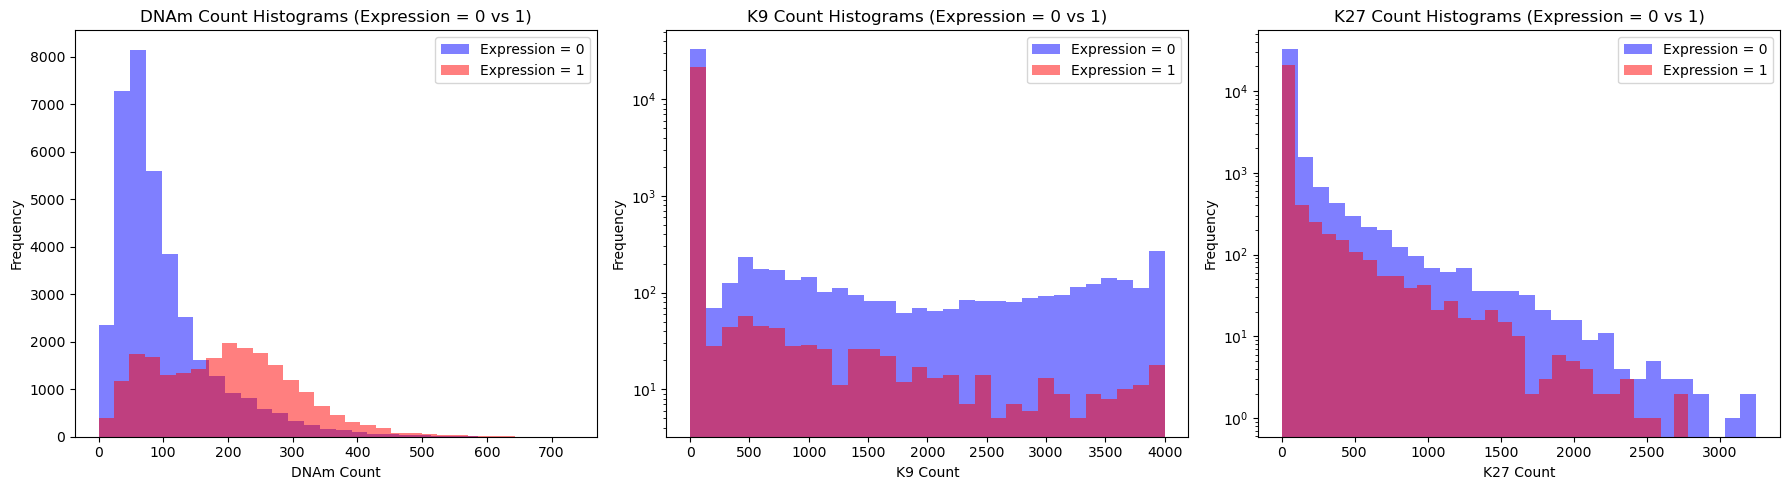

In [8]:
# Filter counts based on expression
DNAm_counts_exp0 = DNAm_counts[rna_expression_binary == 0]
DNAm_counts_exp1 = DNAm_counts[rna_expression_binary == 1]

K9_counts_exp0 = K9_counts[rna_expression_binary == 0]
K9_counts_exp1 = K9_counts[rna_expression_binary == 1]

K27_counts_exp0 = K27_counts[rna_expression_binary == 0]
K27_counts_exp1 = K27_counts[rna_expression_binary == 1]


plt.figure(figsize=(18, 5))

# Plot 1: DNAm Count Histograms for exp = 0 and exp = 1
plt.subplot(1, 3, 1)
plt.hist(DNAm_counts_exp0, bins=30, alpha=0.5, label='Expression = 0', color='blue')
plt.hist(DNAm_counts_exp1, bins=30, alpha=0.5, label='Expression = 1', color='red')
plt.xlabel('DNAm Count')
plt.ylabel('Frequency')
plt.title('DNAm Count Histograms (Expression = 0 vs 1)')
plt.legend()

# Plot 2: K9 Count Histograms for exp = 0 and exp = 1
plt.subplot(1, 3, 2)
plt.hist(K9_counts_exp0, bins=30, alpha=0.5, label='Expression = 0', color='blue')
plt.hist(K9_counts_exp1, bins=30, alpha=0.5, label='Expression = 1', color='red')
plt.xlabel('K9 Count')
plt.ylabel('Frequency')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('K9 Count Histograms (Expression = 0 vs 1)')
plt.legend()

# Plot 3: K27 Count Histograms for exp = 0 and exp = 1
plt.subplot(1, 3, 3)
plt.hist(K27_counts_exp0, bins=30, alpha=0.5, label='Expression = 0', color='blue')
plt.hist(K27_counts_exp1, bins=30, alpha=0.5, label='Expression = 1', color='red')
plt.xlabel('K27 Count')
plt.ylabel('Frequency')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('K27 Count Histograms (Expression = 0 vs 1)')
plt.legend()

plt.tight_layout()
plt.show()

awman

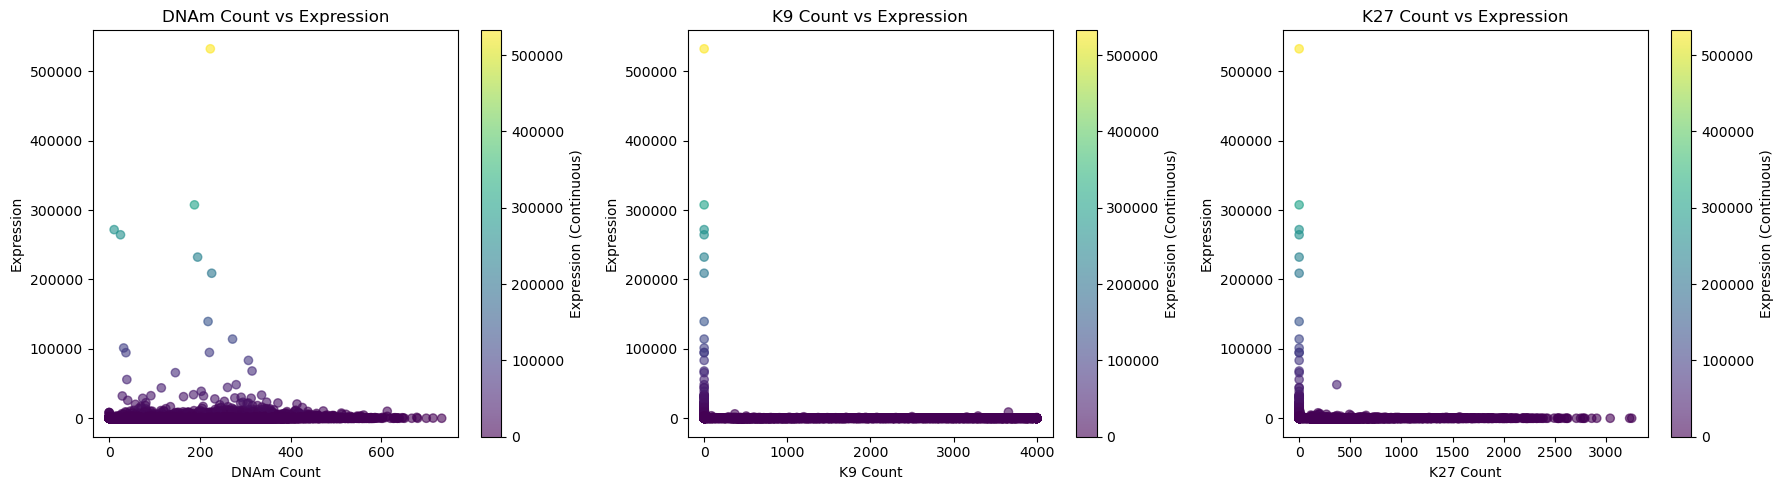

In [10]:
## Comparing against continuous expression values


plt.figure(figsize=(18, 5))

# Plot 1: DNAm Counts vs Continuous Expression
plt.subplot(1, 3, 1)
plt.scatter(DNAm_counts, rna_expression_cont, alpha=0.6, c=rna_expression_cont, cmap='viridis')
plt.colorbar(label='Expression (Continuous)')
plt.xlabel('DNAm Count')
plt.ylabel('Expression')
plt.title('DNAm Count vs Expression')

# Plot 2: K9 Counts vs Continuous Expression
plt.subplot(1, 3, 2)
plt.scatter(K9_counts, rna_expression_cont, alpha=0.6, c=rna_expression_cont, cmap='viridis')
plt.colorbar(label='Expression (Continuous)')
plt.xlabel('K9 Count')
plt.ylabel('Expression')
plt.title('K9 Count vs Expression')

# Plot 3: K27 Counts vs Continuous Expression
plt.subplot(1, 3, 3)
plt.scatter(K27_counts, rna_expression_cont, alpha=0.6, c=rna_expression_cont, cmap='viridis')
plt.colorbar(label='Expression (Continuous)')
plt.xlabel('K27 Count')
plt.ylabel('Expression')
plt.title('K27 Count vs Expression')

plt.tight_layout()
plt.show()

Is the finding here that DNAm, K9 and K27 impacts aren't noticeable unless the gene is highly expressed?

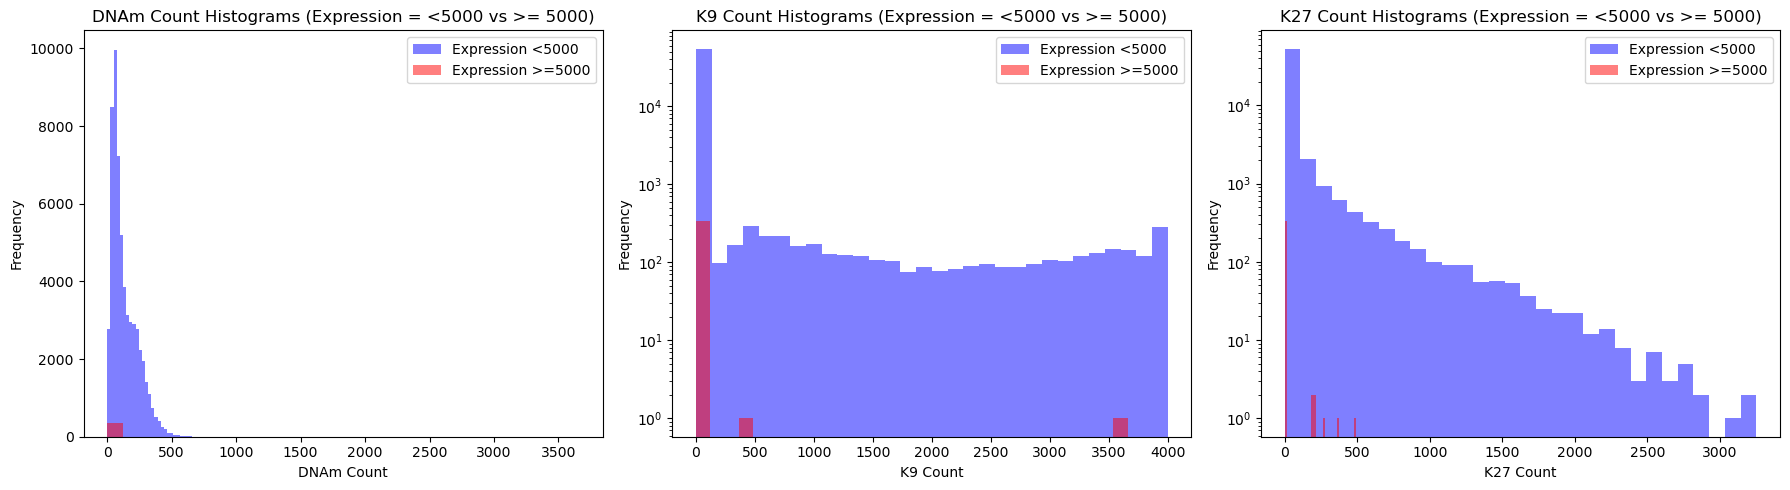

In [12]:
### Comparing under and over 5000

# Filter counts based on expression
DNAm_counts_explow = DNAm_counts[rna_expression_cont < 5000]
DNAm_counts_exphigh = DNAm_counts[rna_expression_cont >= 5000]

K9_counts_explow = K9_counts[rna_expression_cont < 5000]
K9_counts_exphigh = K9_counts[rna_expression_cont >= 5000]

K27_counts_explow = K27_counts[rna_expression_cont < 5000]
K27_counts_exphigh = K27_counts[rna_expression_cont >= 5000]


plt.figure(figsize=(18, 5))

# Plot 1: DNAm Count Histograms for exp = 0 and exp = 1
plt.subplot(1, 3, 1)
plt.hist(DNAm_counts_explow, bins=30, alpha=0.5, label='Expression <5000', color='blue')
plt.hist(K9_counts_exphigh, bins=30, alpha=0.5, label='Expression >=5000', color='red')
plt.xlabel('DNAm Count')
plt.ylabel('Frequency')
plt.title('DNAm Count Histograms (Expression = <5000 vs >= 5000)')
plt.legend()

# Plot 2: K9 Count Histograms for exp = 0 and exp = 1
plt.subplot(1, 3, 2)
plt.hist(K9_counts_explow, bins=30, alpha=0.5, label='Expression <5000', color='blue')
plt.hist(K9_counts_exphigh, bins=30, alpha=0.5, label='Expression >=5000', color='red')
plt.xlabel('K9 Count')
plt.ylabel('Frequency')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('K9 Count Histograms (Expression = <5000 vs >= 5000)')
plt.legend()

# Plot 3: K27 Count Histograms for exp = 0 and exp = 1
plt.subplot(1, 3, 3)
plt.hist(K27_counts_explow, bins=30, alpha=0.5, label='Expression <5000', color='blue')
plt.hist(K27_counts_exphigh, bins=30, alpha=0.5, label='Expression >=5000', color='red')
plt.xlabel('K27 Count')
plt.ylabel('Frequency')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('K27 Count Histograms (Expression = <5000 vs >= 5000)')
plt.legend()

plt.tight_layout()
plt.show()

Is the finding here that 'silent genes' have a large range of DNAm values that are shared with lowly expressed genes. Highly expressed genes have a very high value. 

Aim is to see if there is a specific combination of the three modifications that can tell us if a gene is silenced or not. There is much more ambiguity for silenced and lowly expressed than highly expressed genes with relation to these modifications